# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

# Loading the dataset
bodyFat_dataset_url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"
df_bodyFat = pd.read_csv(bodyFat_dataset_url, sep="\t")

# Count missing values
null_per_column = df_bodyFat.isnull().sum()
total_null = df_bodyFat.isnull().sum().sum()
print("----------------------------------------------")
print(f"Count of missing values per column : \n{null_per_column}")
print("----------------------------------------------")
print(f"Total number of missing values in the dataset = {total_null}")

# Drop rows with missing values if they exist 
df_bodyFat = df_bodyFat.dropna()

# Dataset shape
print("----------------------------------------------")
print(f"Shape of the dataset:")
print(f"> Number of rows = {df_bodyFat.shape[0]}")
print(f"> Number of columns = {df_bodyFat.shape[1]}")
print("----------------------------------------------")

# Show a random sample of 10 rows
df_bodyFat_sample = df_bodyFat.sample(10, random_state=2025)
print("---------- random sample of 10 rows ----------\n")
df_bodyFat_sample


----------------------------------------------
Count of missing values per column : 
Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
target     0
dtype: int64
----------------------------------------------
Total number of missing values in the dataset = 0
----------------------------------------------
Shape of the dataset:
> Number of rows = 252
> Number of columns = 15
----------------------------------------------
---------- random sample of 10 rows ----------



,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
14,1.0484,35.0,187.75,69.50,40.500000,101.300003,96.400002,100.099998,69.000000,39.000000,23.100000,36.099998,30.500000,18.200001,22.1
187,1.0524,41.0,210.50,72.00,38.500000,107.400002,98.900002,104.099998,63.500000,39.799999,23.500000,36.400002,30.400000,19.100000,20.4
83,1.0377,70.0,170.75,70.00,38.700001,101.800003,94.900002,95.000000,56.000000,36.500000,24.100000,31.200001,27.299999,19.200001,27.0
48,1.0678,45.0,135.75,68.50,32.799999,92.300003,83.400002,90.400002,52.000000,35.799999,20.600000,28.799999,25.500000,16.299999,13.6
56,1.0524,58.0,181.50,68.00,39.099998,100.000000,99.800003,102.500000,62.099998,39.599998,22.500000,33.099998,28.299999,18.500000,20.4
80,1.0283,67.0,163.75,67.75,38.400002,97.699997,95.800003,97.099998,54.799999,38.200001,23.700001,29.400000,27.200001,19.000000,31.4
133,1.0398,50.0,157.00,66.75,37.799999,100.400002,89.400002,92.300003,56.099998,35.599998,20.500000,33.599998,29.299999,17.299999,26.1
30,1.0716,32.0,182.00,73.75,38.700001,100.500000,88.699997,99.800003,57.500000,38.700001,33.900002,32.500000,27.700001,18.400000,11.9
200,1.0709,43.0,178.25,70.25,37.799999,102.699997,89.199997,99.199997,60.200001,39.200001,23.799999,31.700001,28.400000,18.600000,12.2
161,1.0653,33.0,196.00,73.00,38.500000,103.800003,95.599998,105.099998,61.400002,40.599998,25.000000,31.299999,29.200001,19.100000,14.6


For this final project, I selected the **Body Fat** dataset. This dataset originates from a study on estimating <u>body fat</u> percentage using various <u>body measurements</u>.<br>
The purpose is to explore whether inexpensive, easy-to-obtain measurements can reliably predict a person's body fat. <br><br>
The **Body Fat** dataset contains:
* Number of rows: 252
* Number of columns: 15 (All columns in the dataset are <u>numeric</u>) 


**Missing Values Analysis** <br>
The dataset was inspected for missing values:
* Missing values per column: all zeros
* Total missing values: 0

=> Since no missing values were found, no rows needed to be removed.<br>

**The sample of 10 rows** <br>
After loading the dataset and displaying a random sample of 10 rows, I can observe that the dataset includes 15 columns:
* 14 numerical feature columns (Predictors): measurements such as *Height* and *Hip*
* 1 target column that represents the body fat percentage (continuous numerical variable)

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE

# let's list all columns
df_bodyFat.columns.to_list()

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'target']

#### Column Listing and Descriptions
The dataset contains 15 <u>numeric</u> columns: 
* 14 Features: measurements of body size or composition
* 1 target variable: the calculated body fat percentage

Altogether, they give us a good foundation for exploring whether simple body measurements can be used to estimate body fat without relying on more expensive lab methods.
<br/><br/>
**Feature Columns (Predictors):**
* **Density** <br/>
Body density measured via underwater weighing. It is the key input used in accurate body fat estimation. <br/>
Higher density generally means lower fat percentage.<br/>
    * <u>Data type</u>: continuous numeric
* **Age** <br/>
Age of the individual (in years)<br/>
    * <u>Data type</u>: continuous numeric
* **Weight** <br/>
Body weight in pounds (lbs)<br/>
    * <u>Data type</u>: continuous numeric
* **Height** <br/>
Height in inches <br/>
    * <u>Data type</u>: continuous numeric
* **Neck** <br/>
Neck circumference in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Chest** <br/>
Chest circumference in centimeters (cm), measured around the largest part <br/>
    * <u>Data type</u>: continuous numeric
* **Abdomen** <br/>
Abdominal circumference in centimeters (cm), measured at the naval. <br/>
Literature states that it is highly correlated with body fat. <br/>
    * <u>Data type</u>: continuous numeric
* **Hip** <br/>
Hip circumference in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Thigh** <br/>
Thigh circumference (considering the largest point) in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Knee** <br/>
Knee circumference in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Ankle** <br/>
Ankle circumference in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Biceps** <br/>
Bicep circumference (when it is flexed) in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Forearm** <br/>
Forearm circumference in centimeters (cm) <br/>
    * <u>Data type</u>: continuous numeric
* **Wrist** <br/>
Wrist circumference in centimeters (cm) <br/>
It is often used to estimate body frame size <br/>
    * <u>Data type</u>: continuous numeric


**Target Column:**
* **target** <br/>
The body fat percentage of each individual, calculated using body density from underwater weighing.<br/>
This is the value we aim to model or predict. <br/>
    * <u>Data type</u>: continuous numeric
















### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

*****************************************************************************
 >> EDA
*****************************************************************************


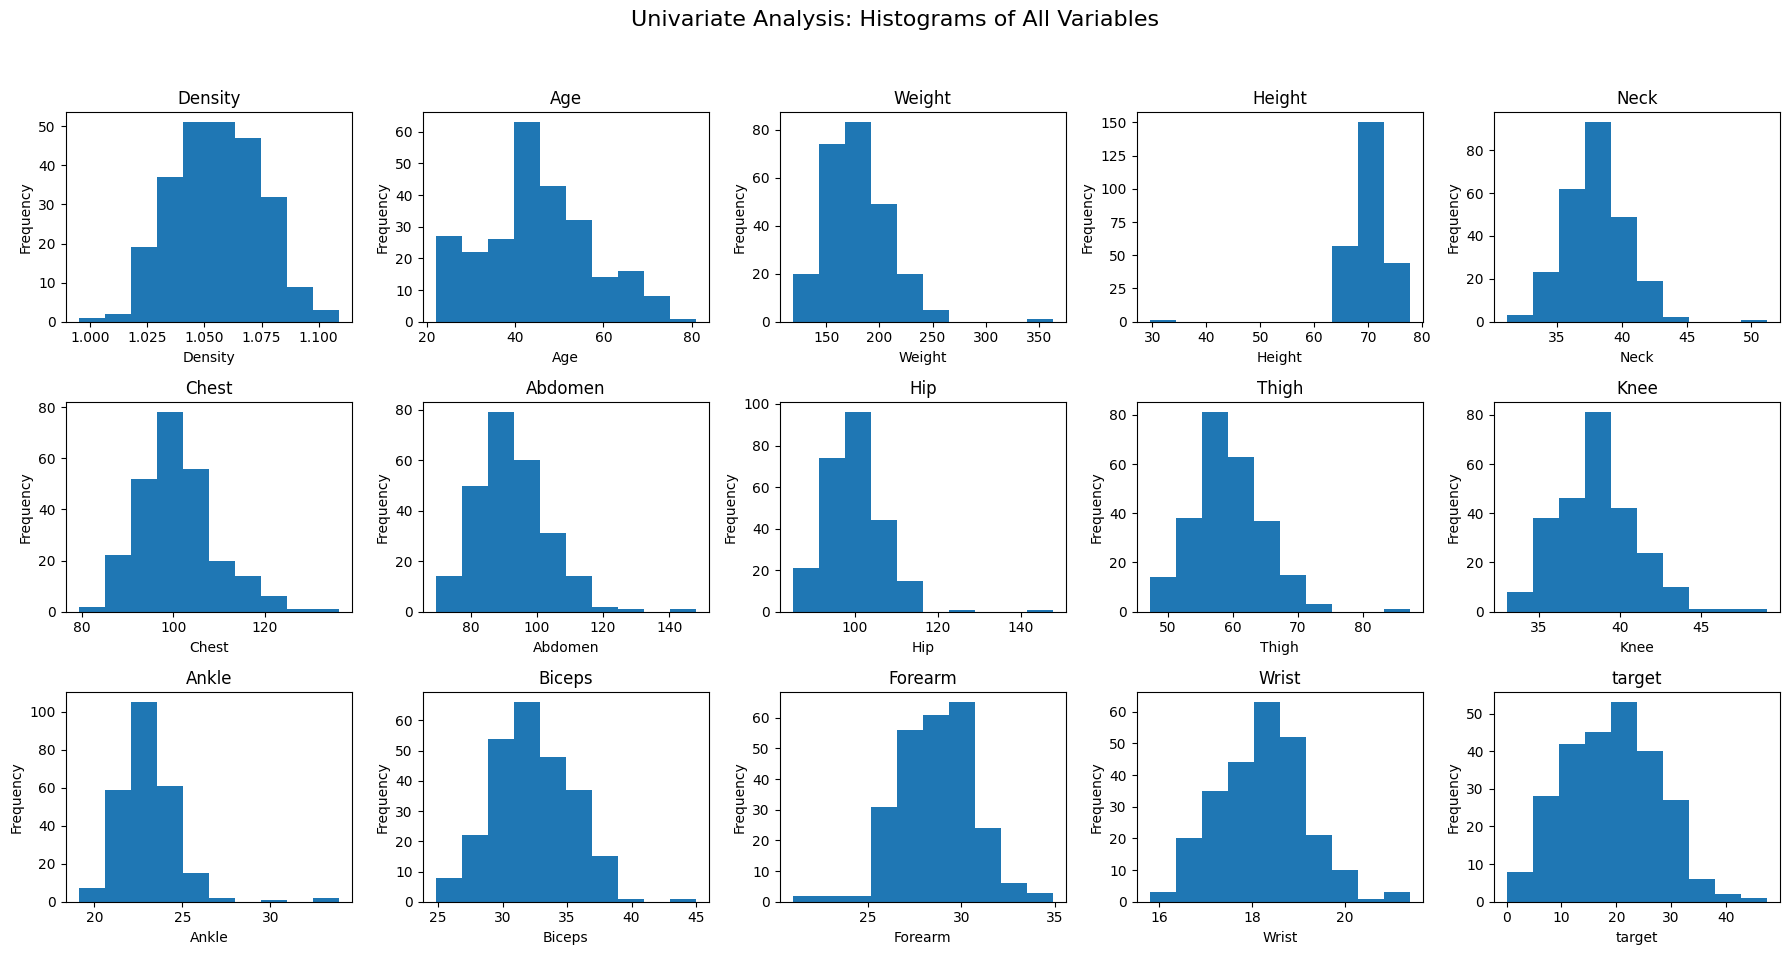

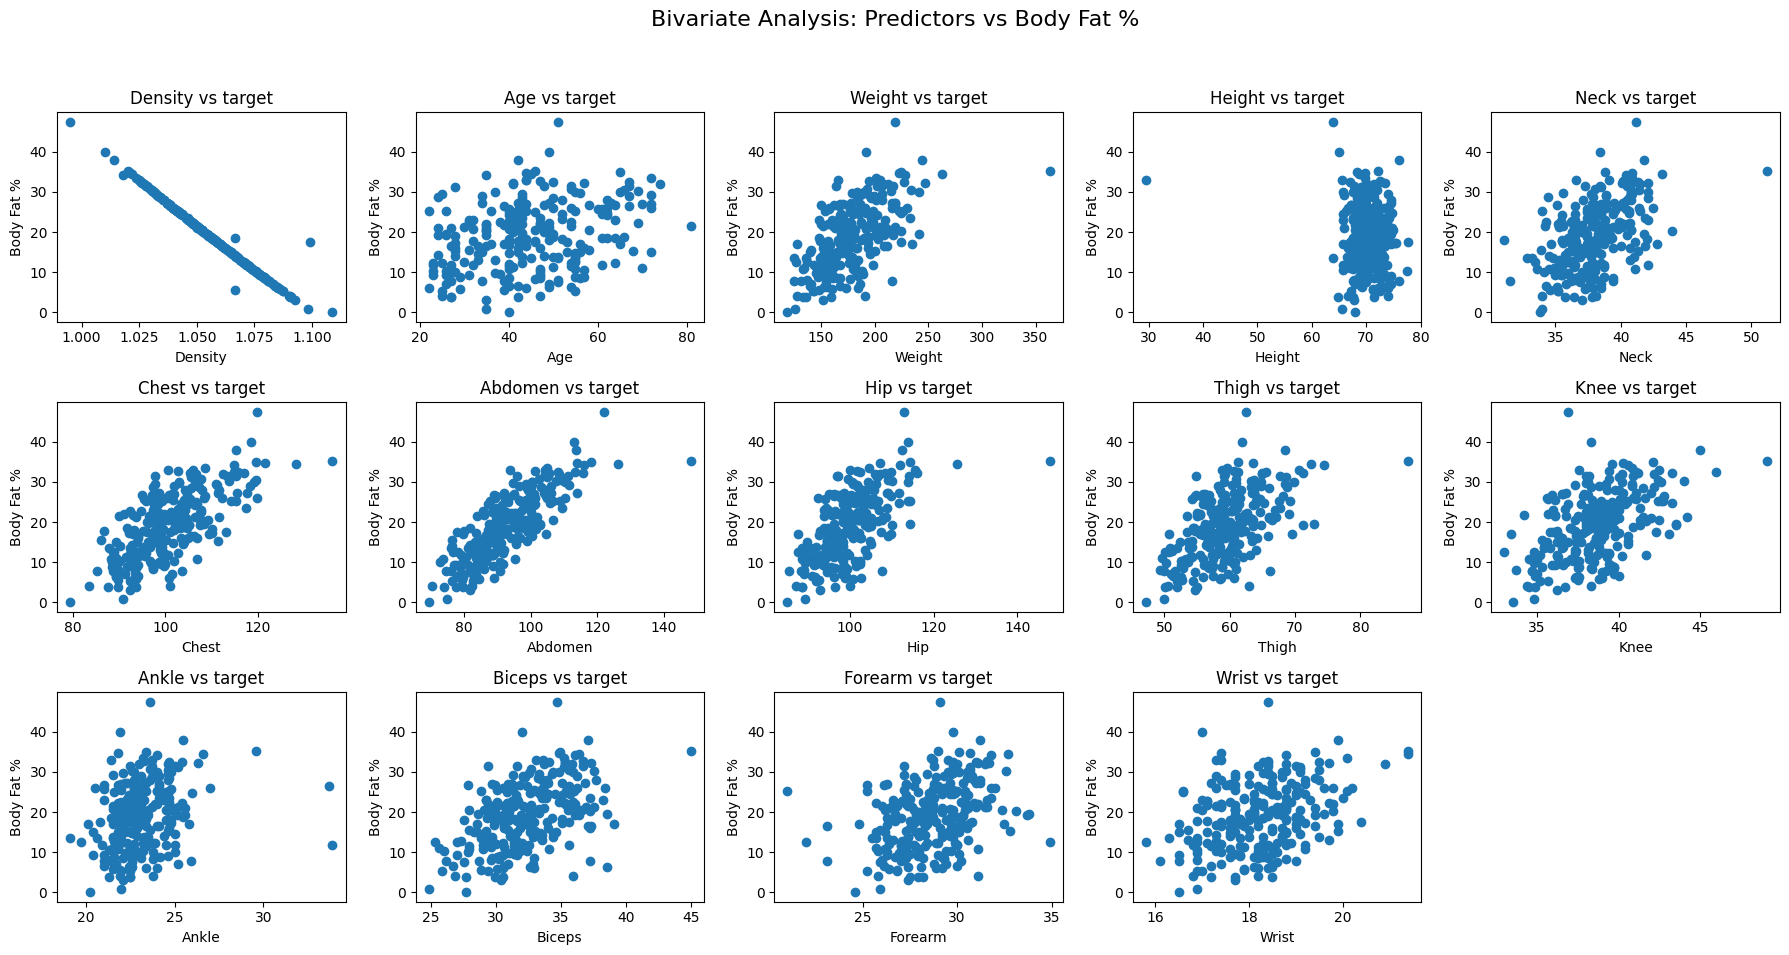

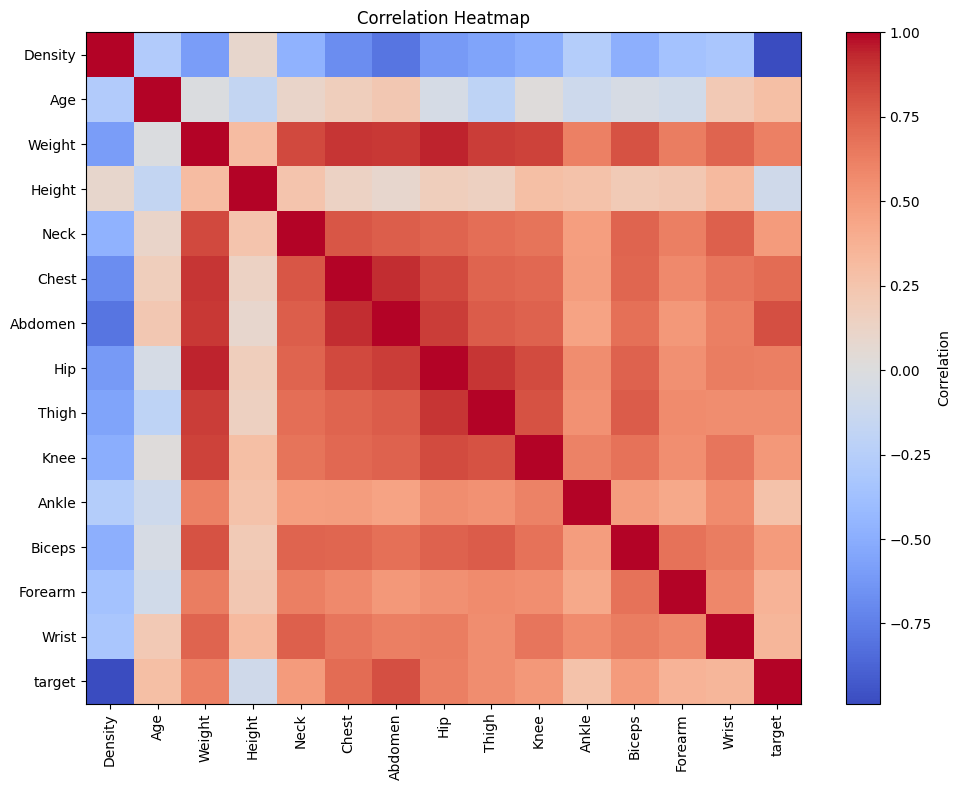

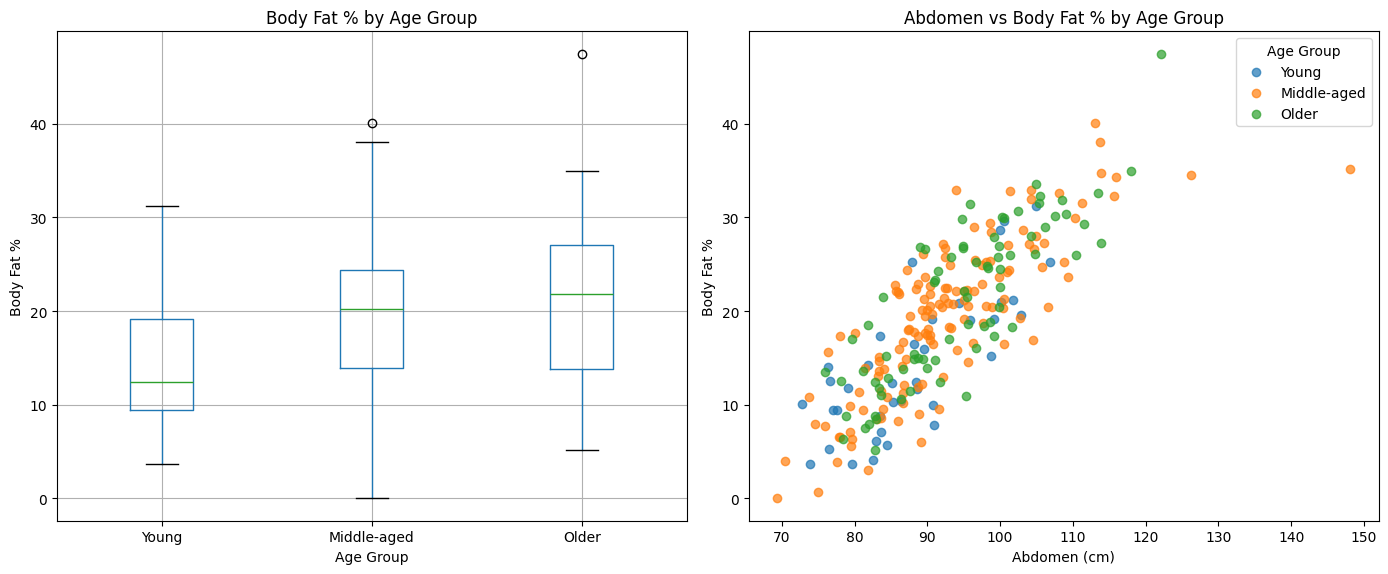

*****************************************************************************
 >> The Three Selected Interesting Charts
*****************************************************************************


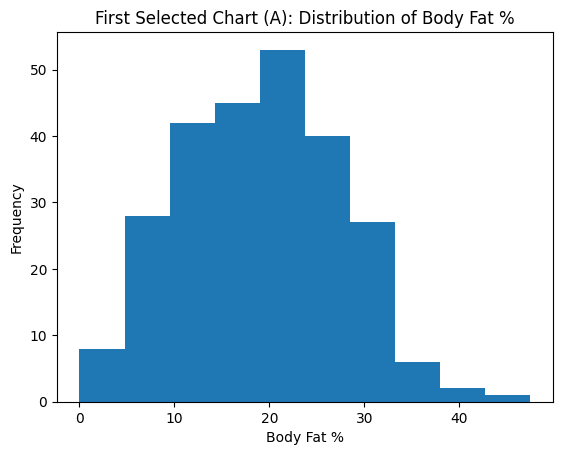

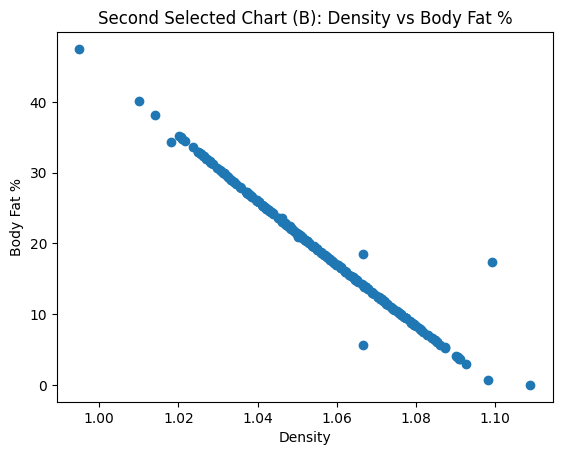

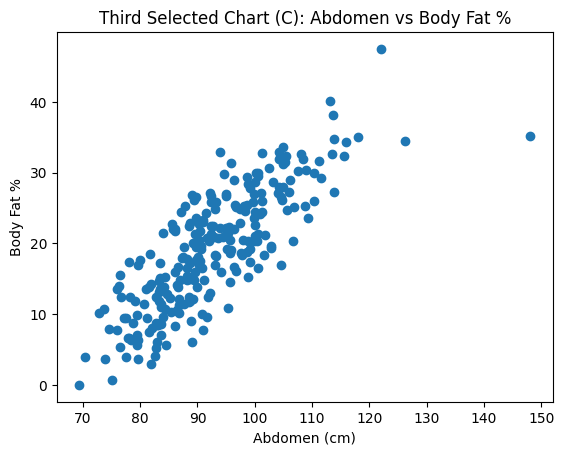

In [5]:
# YOUR CODE HERE

# ************************************ EDA ************************************
# *****************************************************************************
print("*****************************************************************************")
print(" >> EDA")
print("*****************************************************************************")
# ---------------------------------------------------------------
# 1. Univariate Analysis
#    (One variable at a time)
# ---------------------------------------------------------------

# list of column names
cols = df_bodyFat.columns.tolist()
n_cols = len(cols)

# The dataset has 15 columns
# For clear visualization, I opted for: 3 rows x 5 columns = 15 slots
fig1, axes1 = plt.subplots(3, 5, figsize=(18, 10))
axes1 = axes1.flatten()

for i, col in enumerate(cols):
    ax = axes1[i]
    ax.hist(df_bodyFat[col], bins=10)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

fig1.suptitle("Univariate Analysis: Histograms of All Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ---------------------------------------------------------------
# 2. Bivariate Analysis
#    (Each predictor vs Body Fat Percentage)
# ---------------------------------------------------------------
target_col = "target"
predictor_cols = [c for c in cols if c != target_col]

# Again, I opted for 15 slots to accommodate 14 bivariate plots
# The last slot (subplot) will not contain any visuals to display and will get hidden
fig2, axes2 = plt.subplots(3, 5, figsize=(18, 10))
axes2 = axes2.flatten()

for i, col in enumerate(predictor_cols):
    ax = axes2[i]
    ax.scatter(df_bodyFat[col], df_bodyFat[target_col])
    ax.set_title(f"{col} vs {target_col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Body Fat %")

# Hide the last unused subplot
axes2[i+1].set_visible(False)

fig2.suptitle("Bivariate Analysis: Predictors vs Body Fat %", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



# ---------------------------------------------------------------
# Correlation Heatmap
# ---------------------------------------------------------------
corr = df_bodyFat.corr()

fig3, ax3 = plt.subplots(figsize=(10, 8))
cax = ax3.imshow(corr, aspect="auto", cmap='coolwarm')
fig3.colorbar(cax, label="Correlation")
ax3.set_xticks(range(len(corr.columns)))
ax3.set_yticks(range(len(corr.columns)))
ax3.set_xticklabels(corr.columns, rotation=90)
ax3.set_yticklabels(corr.columns)
ax3.set_title("Correlation Heatmap")
plt.tight_layout()




# ---------------------------------------------------------------
# 3. Grouped / Multivariate Analysis
#    (Grouping by Age)
# ---------------------------------------------------------------

# To group by age, I need to create age groups
df_bodyFat["age_group"] = pd.cut(
    df_bodyFat["Age"],
    bins=[0, 30, 50, 100],
    labels=["Young", "Middle-aged", "Older"]
)

fig4, axes4 = plt.subplots(1, 2, figsize=(14, 6))

# 3-1- Boxplot of body fat % by age group
df_bodyFat.boxplot(column=target_col, by="age_group", ax=axes4[0])
axes4[0].set_title("Body Fat % by Age Group")
axes4[0].set_xlabel("Age Group")
axes4[0].set_ylabel("Body Fat %")
# Remove the automatic title added by pandas
fig4.suptitle("")

# 3-2- Abdomen vs Body Fat %, colored by age group
age_groups = df_bodyFat["age_group"].cat.categories

for group in age_groups:
    subset = df_bodyFat[df_bodyFat["age_group"] == group]
    axes4[1].scatter(subset["Abdomen"], subset[target_col], label=str(group), alpha=0.7)

axes4[1].set_title("Abdomen vs Body Fat % by Age Group")
axes4[1].set_xlabel("Abdomen (cm)")
axes4[1].set_ylabel("Body Fat %")
axes4[1].legend(title="Age Group")

plt.tight_layout()
plt.show()

# delete the temporary age_group column
del df_bodyFat["age_group"]



# ********************* Selected Interesting Charts ***************************
# *****************************************************************************
print("*****************************************************************************")
print(" >> The Three Selected Interesting Charts")
print("*****************************************************************************")

# 1) Histogram of Body Fat %
plt.figure()
plt.hist(df_bodyFat['target'])
plt.title("First Selected Chart (A): Distribution of Body Fat %")
plt.xlabel("Body Fat %")
plt.ylabel("Frequency")
plt.show()

# 2) Density vs Body Fat %
plt.figure()
plt.scatter(df_bodyFat['Density'], df_bodyFat['target'])
plt.title("Second Selected Chart (B): Density vs Body Fat %")
plt.xlabel("Density")
plt.ylabel("Body Fat %")
plt.show()

# 3) Abdomen vs Body Fat %
plt.figure()
plt.scatter(df_bodyFat['Abdomen'], df_bodyFat['target'])
plt.title("Third Selected Chart (C): Abdomen vs Body Fat %")
plt.xlabel("Abdomen (cm)")
plt.ylabel("Body Fat %")
plt.show()





#### Exploratory Data Analysis (EDA)
To understand the *body fat* dataset more deeply, I conducted an extensive exploratory analysis from 3 perspectives:
* **Univariate analysis** : examining one variable at a time
* **Bivariate analysis** : examining relationships between two variables
* **Grouped / multivariate analysis** : exploring patterns after grouping the data

This approach allows us to uncover trends, distributions, correlations, and potentially <u>important predictors</u> of body fat percentage.
<br/><br/>

**Selected Top 3 Most Interesting Charts** <br/>
After reviewing all charts from the univariate, bivariate, and grouped analyses, the following three stood out as most informative and meaningful:
* **Selected Chart A : Distribution of Body Fat % (Histogram)** <br/>
This chart reveals how body fat is spread across the population:
    * The chart shows a **right-skewed distribution**, meaning a few individuals have notably high body fat
    * Most participants fall between **10% and 25%**, giving us a baseline expectation for typical values
    * This helps set expectations for models: <u>predicting extremely high body fat values may be more difficult due to limited data in that range</u>
    * This helps identify potential <u>outliers</u> early, which could influence regression modeling later.


* **Selected Chart B : Density vs Body Fat % (Scatterplot)** <br/>
This plot shows the strongest and most fundamental relationship in the *body fat* dataset:
    * The relationship is **very strong, smooth, and inverse**
    * Body density <u>almost perfectly predicts</u> body fat: **higher density indicates lower body fat**
    * The plot validates the dataset and highlights **density as the most critical predictor**
    * The plot reinforces that body fat estimation formulas (indicated in several literatures) are <u>based directly on density</u>


* **Selected Chart C : Abdomen Circumference vs Body Fat % (Scatterplot)** <br/>
This chart demonstrates the most important real-world practical predictor:
    * There is a **strong positive linear relationship** between *abdomen size* and *body fat* (as abdominal size increases, body fat tends to rise)
    * Abdomen circumference is <u>simple, cheap, and fast to measure</u> (far easier than underwater density testing)
    * This <u>supports the study’s purpose</u>: *Can we estimate body fat using easy tape measurements?*
    * Among all <u>quantitative measurements of the human body</u>, *abdomen* is clearly the most **powerful predictor**


### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

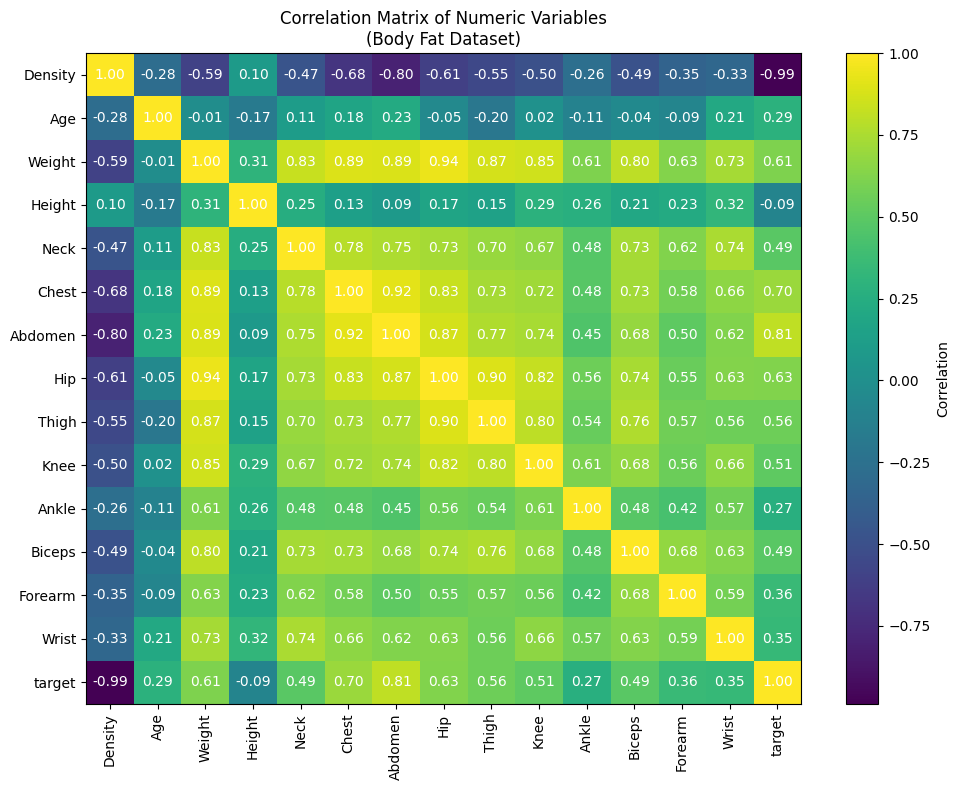

In [6]:
# YOUR CODE HERE

# To compute the coorelatopn matrix, we need to consider numeric columns only
df_bodyFat_numeric = df_bodyFat.select_dtypes(include=[np.number])
corr_matrix = df_bodyFat_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="viridis", aspect="auto")
plt.colorbar(label="Correlation")

# we adjust x and y axis for clarity purposes
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of Numeric Variables\n(Body Fat Dataset)")

# For better visualization, let's annotate the heatmap cells with correlation values 
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha="center", va="center", color="white")

plt.tight_layout()
plt.show()



#### Correlation Matrix & Most Correlated Pair
In this problem, I computed and plotted the correlation matrix of all numeric variables in the *body fat* dataset. <br>
The heatmap makes it easy to see which variables move together strongly, especially when annotated with correlation scores
<br/><br/>

**Most strongly correlated pair** <br/>
Based on the numeric correlation matrix, the **pair of <u>different columns</u> with the strongest correlation** is:
* ***Density* and *target* (*Body Fat Percentage*)**
    * This pair shows the highest magnitude correlation: **corr(*Density* , *target*) = -0.99 | MAGNITUDE( corr(*Density* , *target*) ) = 0.99**
    * The relationship is **strongly negative**:
        * Higher density => Lower body fat percentage
        * Lower density => Higher body fat percentage



**Additional strong correlations** <br/>
The heatmap also highlights other notable relationships:
* *Abdomen* and *target*: corr(*Abdomen* , *target*) = 0.81  (strong positive correlation)
* *Weight* and *Chest*: corr(*Weight* , *Chest*) = 0.89  (strong positive correlation)
* *Hip* and *Abdomen*: corr(*Hip* , *Abdomen*) = 0.87  (strong positive correlation)

=> The strength of the relationship between *Density* and *target* (*Body Fat Percentage*) is the highest in terms of correlation.



### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [7]:
# YOUR CODE HERE

# We will use these three regression model classes in Problem 6:
model_classes = {
    "LinearRegression": sklearn.linear_model.LinearRegression,
    "Ridge": sklearn.linear_model.Ridge,
    "Lasso": sklearn.linear_model.Lasso,
}

# scikit-learn documentation links
sklearn_links = {
    "LinearRegression": "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html",
    "Ridge": "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html",
    "Lasso": "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html",
}

# non–scikit-learn, concept links (Source: Wikipedia)
wikipedia_links = {
    "LinearRegression": "https://en.wikipedia.org/wiki/Linear_regression",
    "Ridge": "https://en.wikipedia.org/wiki/Ridge_regression",
    "Lasso": "https://en.wikipedia.org/wiki/Lasso_%28statistics%29",
}

Given the constraint that we can only use **sklearn.linear_model**, these are the 3 regression model classes that I am choosing to implement for Problem 6:
* **LinearRegression** : baseline ordinary least squares regression model
    * scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    * Wikipedia link: https://en.wikipedia.org/wiki/Linear_regression
* **Ridge** : linear regression with L2 regularization (<u>it shrinks all coefficients and handles multicollinearity</u>)
    * scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
    * Wikipedia link: https://en.wikipedia.org/wiki/Ridge_regression
* **Lasso** : linear regression with L1 regularization (<u> it performs feature selection by zeroing some coefficients</u>)
    * scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    * Wikipedia link: https://en.wikipedia.org/wiki/Lasso_%28statistics%29

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

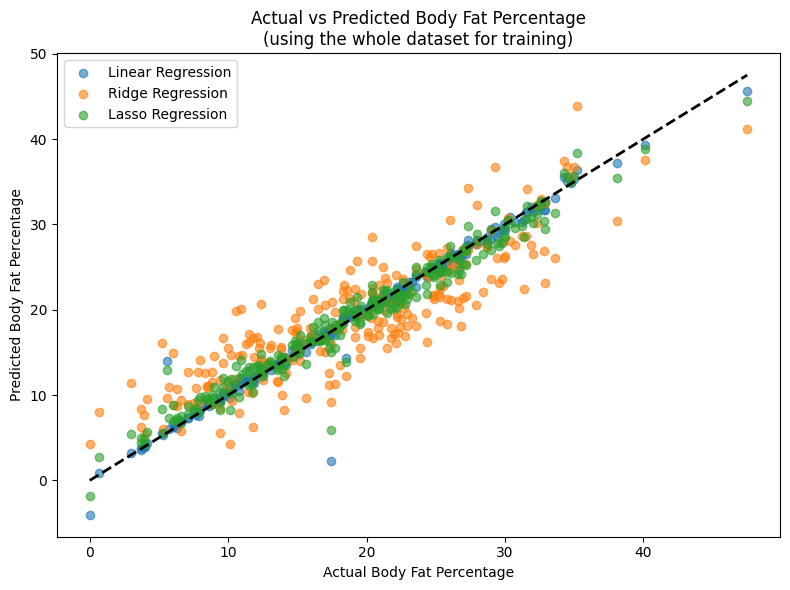

{'Linear Regression': {'L2 Loss': np.float64(1.5272041202364655),
  'L1 Loss': np.float64(0.48019622407529433)},
 'Ridge Regression': {'L2 Loss': np.float64(16.7706267555516),
  'L1 Loss': np.float64(3.3670432335064477)},
 'Lasso Regression': {'L2 Loss': np.float64(2.565460697267238),
  'L1 Loss': np.float64(1.156281247957451)}}

In [10]:
# YOUR CODE HERE

# Let's define our features variable X and our target variable y (we are using the entire body fat dataset this time)
X = df_bodyFat.drop(columns=["target"])
y = df_bodyFat["target"]

# ------------------------------------------------------------------------------------------------------
# Build the three regression models, that we picked and provided some documentation about, in Problem 5
# ------------------------------------------------------------------------------------------------------

# The dictionary "regression_models" holds the names of the models and their corresponding sklearn classes
regression_models = {
    "Linear Regression": sklearn.linear_model.LinearRegression(),
    "Ridge Regression": sklearn.linear_model.Ridge(alpha=1.0),
    "Lasso Regression": sklearn.linear_model.Lasso(alpha=0.01)
}

# The dictionary "predictions" is designed to save the predictions generated by each regression model after getting fitted to the whole dataset 
predictions = {}

for name, model in regression_models.items():
    model.fit(X, y)
    predictions[name] = model.predict(X)

# -------------------------
# Visualization: Plot actual vs predicted values
# -------------------------
plt.figure(figsize=(8, 6))

for name, y_pred in predictions.items():
    # plot a scatter plot for each trained regression model 
    plt.scatter(y, y_pred, label=name, alpha=0.6)

# The Reference line (y = x) represents the case of a perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle="--", linewidth=2, color="black")

plt.xlabel("Actual Body Fat Percentage")
plt.ylabel("Predicted Body Fat Percentage")
plt.title("Actual vs Predicted Body Fat Percentage\n(using the whole dataset for training)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Compute L2 and L1 losses for each regression model 
# -------------------------

# lthe dictionary "losses" is designed to save L1 & L2 of each regression model
losses = {}

for name, y_pred in predictions.items():
    l2_loss = np.mean((y - y_pred) ** 2)
    l1_loss = np.mean(np.abs(y - y_pred))
    losses[name] = {"L2 Loss": l2_loss, "L1 Loss": l1_loss}

losses

#### Regression Models, Predictions, and L1/L2 Losses
In this problem, I built 3 different regression models using the <u>entire dataset</u>:
* **Linear Regression**
* **Ridge Regression**
* **Lasso Regression**

Each model was trained on <u>all features</u> to predict the *target* variable which represents the *body fat percentage*.
<br/><br/>

**Visualization: Actual vs Predicted Plot**

The dashed diagonal line (colored in black) represents perfect predictions [y(predictions) = x(actual)]: points closer to this line indicate better model performance:
* **Linear Regression**
    * predictions align most closely with the diagonal line 
* **Ridge Regression** 
    * predictions are more spread around the diagonal line
* **Lasso Regression** 
    * it performs better than Ridge but slightly worse than Linear Regression

<br/><br/>
**Loss Metrics (L1 , L2)** <br/>

| Model             |    L1    |   L2     |
| :---------------- | :------: | :----:   |
| Linear Regression |**0.48**  | **1.53** |
| Ridge Regression  |   3.37   |  16.77   |
| Lasso Regression  |  1.16    |   2.57   |

**Interpretation**<br/>
All three models capture the general trend in body fat prediction (points on the scatter plot are relatively close to the diagonal line and not too spread out):
* Linear Regression achieves the lowest L1 and L2 losses  (<u>the best fit on the full dataset</u>)
* Lasso Regression performs reasonably well, but its regularization technique (feature selection by zeroing some coefficients) <u>slightly increases error</u>
* Ridge Regression performs the worst. This model with its regularization technique have the highest pair of (L1,L2) loss values


### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE